In [2]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [4]:
# Vemos la forma
df.shape

(240000, 22)

In [5]:
df.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [6]:
df

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,...,48551.0,NaN,NaN,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,...,47835.0,NaN,NaN,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,1.0,...,53666.0,NaN,NaN,2015-02-08,0.0,0.0,0.0,0.0,0.0,650000.0
259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10,0.0,0.0,0.0,1.0,1.0,1940000.0
131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,2.0,...,50003995.0,NaN,NaN,2015-03-03,0.0,0.0,0.0,0.0,0.0,3400000.0


In [6]:
df.head(1)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0


vemos los valores más comunes de varias columnas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [15]:
df.describe()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [5]:
df.describe(include='all')

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,234613,238381,239954,186928,239628,239845,196445.000000,217529.000000,202235.000000,213779.000000,...,2.113790e+05,116512.000000,116512.000000,240000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
unique,186191,232187,24,140269,875,32,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1830,NaN,NaN,NaN,NaN,NaN,NaN
top,casa en venta,empresa dedicada a los ante notario y regist...,Casa,-,Querétaro,Distrito Federal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,468,119,141717,660,12646,58790,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.116114,2.902326,1.546874,2.132417,...,2.423468e+06,20.696818,-99.509221,NaN,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,9.553830,0.896894,0.853507,0.912546,...,1.056794e+07,3.137884,9.744143,NaN,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,...,2.200000e+01,-100.886679,-125.859375,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,1.000000,1.000000,...,2.489000e+04,19.359846,-100.977908,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05


In [8]:
df.tipodepropiedad.value_counts().head()

Casa                  141717
Apartamento            57341
Casa en condominio     19297
Terreno                 9945
Local Comercial         3055
Name: tipodepropiedad, dtype: int64

In [9]:
df.ciudad.value_counts().head()

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
Name: ciudad, dtype: int64

In [10]:
df.provincia.value_counts().head()

Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Name: provincia, dtype: int64

In [11]:
df.habitaciones.value_counts().head()

3.0    121887
2.0     57808
4.0     25068
1.0      5069
5.0      4596
Name: habitaciones, dtype: int64

In [11]:
df.garages.value_counts().head()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [12]:
df.banos.value_counts().head()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [13]:
df.piscina.value_counts().head()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [14]:
df.usosmultiples.value_counts().head()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [15]:
df.gimnasio.value_counts().head()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [16]:
df.escuelascercanas.value_counts().head()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [17]:
df.centroscomercialescercanos.value_counts().head()

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [12]:
first_five = df.descripcion.str.split(n=5, expand=True)
first_five.head()

,0,1,2,3,4,5
id,,,,,,
254099,depto.,interior,de,"80.15m2,",consta,"de sala comedor cocina equipada, área de lavad..."
53461,<p>entre,sonora,y,"guerrero,",atr&aacute;s,"del hospital &aacute;ngeles del pedregal, en e..."
247984,descripcion,la,mejor,ubicacion,residencial,"en el oriente de la ciudad urbi versalles, te ..."
209067,casa,en,privada,con,caseta,"de vigilancia casas de dos y tres recamaras, a..."
185997,bonito,departamento,en,excelentes,condiciones,muy buena ubicacion listo para habitar llameno...


In [17]:
df.select_dtypes(['number'])

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,
254099,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2273000.0
53461,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0,3600000.0
247984,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1200000.0
209067,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0,650000.0
185997,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,2.0,2.0,1.0,67.0,NaN,53666.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,650000.0
259178,0.0,3.0,3.0,3.0,200.0,250.0,51954.0,19.294665,-99.692916,0.0,0.0,0.0,1.0,1.0,1940000.0
131932,20.0,2.0,1.0,2.0,138.0,138.0,50003995.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,3400000.0


In [13]:
df.isnull().sum()

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [14]:
print(df.isnull().any())

titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool


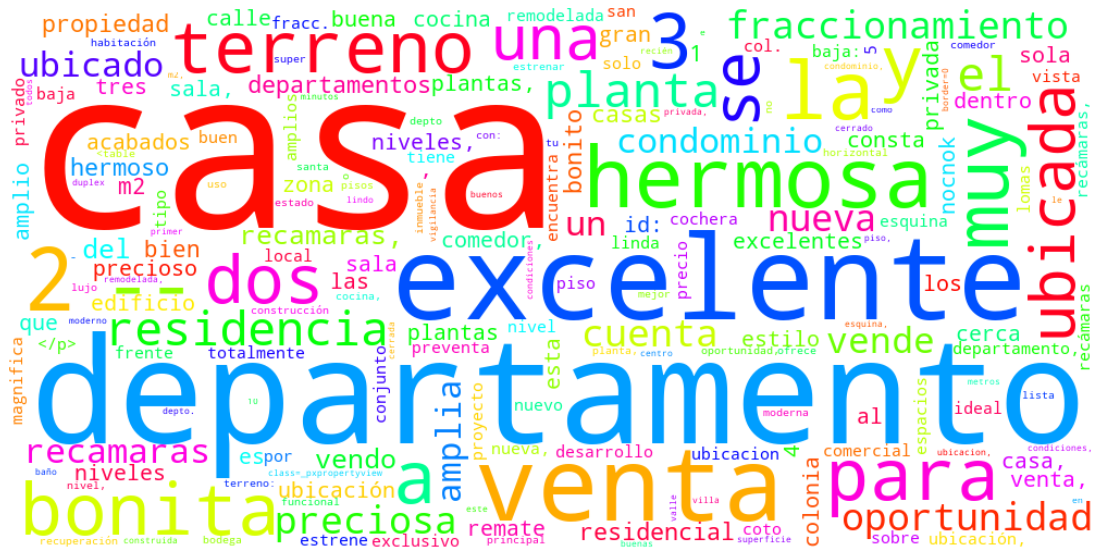

In [20]:
wordcloud= WordCloud(width=1000, height=500, colormap="hsv", background_color='white')
wordcloud.generate_from_frequencies(frequencies=words_df.word.value_counts())

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis('off')
plt.show()